In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


import numpy as np

def sigmoid(x):
 return 1/(1 + np.exp(-x))

In [44]:



pqr_agrs_100_30k = pd.read_csv('../../runs/cass_ALL_520/scalarOut/merge_LP_mcts_GO.csv', header = 2)

In [45]:
pqr_agrs_100_30k

,wall_time,step,run/total_games,run/total_wins,run/total_reward,run/length
0,1.621526e+09,36,2.0,1.0,1.0,35.0
1,1.621526e+09,71,4.0,2.0,1.0,34.0
2,1.621526e+09,104,6.0,2.0,-1.0,32.0
3,1.621526e+09,138,8.0,2.0,-1.0,34.0
4,1.621526e+09,181,10.0,2.0,-1.0,43.0
...,...,...,...,...,...,...
23723,1.621524e+09,99874,5264.0,1595.0,1.0,34.0
23724,1.621524e+09,99912,5266.0,1595.0,-1.0,38.0
23725,1.621524e+09,99938,5268.0,1596.0,1.0,26.0
23726,1.621524e+09,99980,5270.0,1597.0,1.0,41.0


In [46]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']

    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']


# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).std()
rolling

df_av_at_step['reward'] = (rolling['reward']/2) + .5
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
eval_pooledThirds = df_av_at_step
eval_pooledThirds


,step,reward,length,reward_se,length_se
0,26.0,1.000000,25.000000,0.000000,0.000000
1,27.0,1.000000,25.750750,0.000000,1.060660
2,30.0,1.000000,26.836000,0.000000,2.021055
3,31.0,0.749250,27.880125,1.000999,2.657777
4,36.0,0.699200,29.309802,0.894761,3.932109
...,...,...,...,...,...
21477,100022.0,0.597997,36.626002,0.956358,9.395507
21478,100023.0,0.596802,36.620755,0.956895,9.386849
21479,100026.0,0.597608,36.619514,0.956618,9.377508
21480,100028.0,0.598411,36.614281,0.956338,9.368866


In [47]:

pqr_agrs_100_30k = pd.read_csv('../../runs/cass_ALL_520/scalarOut/merge_noLP_mcts_GO.csv', header = 2)

In [48]:
pqr_agrs_100_30k

,wall_time,step,run/total_games,run/total_wins,run/total_reward,run/length
0,1.621524e+09,0,1.0,0.0,-1.0,27.0
1,1.621524e+09,27,3.0,0.0,-1.0,41.0
2,1.621524e+09,68,5.0,1.0,1.0,42.0
3,1.621524e+09,110,7.0,1.0,-1.0,27.0
4,1.621524e+09,137,9.0,2.0,1.0,50.0
...,...,...,...,...,...,...
23722,1.621524e+09,99826,5303.0,723.0,-1.0,51.0
23723,1.621524e+09,99877,5305.0,723.0,-1.0,43.0
23724,1.621524e+09,99920,5307.0,723.0,-1.0,35.0
23725,1.621524e+09,99955,5309.0,723.0,-1.0,38.0


In [49]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']

    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']


# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).std()
rolling

# center at 50 and divide space by 2 to put between 0 and 1
df_av_at_step['reward'] = (rolling['reward']/2) + .5
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
eval_pooled = df_av_at_step
eval_pooled



,step,reward,length,reward_se,length_se
0,0.0,0.444444,40.222222,0.000000,0.000000
1,26.0,0.222000,35.106000,0.628539,7.228203
2,27.0,0.314852,37.575598,0.548162,6.658776
3,30.0,0.486653,39.938771,0.818833,7.195777
4,31.0,0.388933,37.541456,0.832103,8.209016
...,...,...,...,...,...
21468,99988.0,0.408739,37.103190,0.955897,9.504803
21469,99990.0,0.407922,37.100986,0.955639,9.495431
21470,99991.0,0.409105,37.112772,0.956149,9.489600
21471,99993.0,0.408288,37.108551,0.955892,9.480585


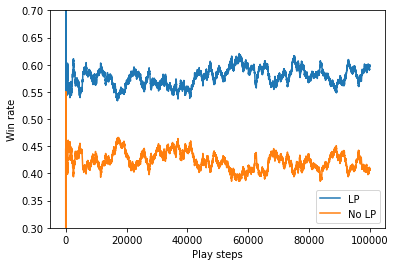

In [51]:
import itertools
marker = itertools.cycle((',', '+', 'o', '*'))


fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')
#sns.lineplot(x="step", y="reward", data=eval_LP3_DFA ,ax=axs, ci=99, )
col=sns.color_palette("tab10")
#sns.lineplot(x="step", y="reward", data=eval_LP3_DFA,ax=axs, ci=99,
 #            )
sns.lineplot(x="step", y="reward", data=eval_pooledThirds,ax=axs, ci=99,
             )

sns.lineplot(x="step", y="reward", data=eval_pooled,ax=axs, ci=99,
             )
#axs.fill_between(x=eval_pooledThirds["step"], y1=eval_pooledThirds["reward"] + eval_pooledThirds["reward_se"],
#                y2=eval_pooledThirds["reward"] - eval_pooledThirds["reward_se"], alpha=.5)
#axs.fill_between(x=eval_pooled["step"], y1=eval_pooled["reward"] + eval_pooled["reward_se"],
#                 y2=eval_pooled["reward"] - eval_pooled["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_lp_no_dfa["step"], y1=df_no_lp_no_dfa["reward"] + df_no_lp_no_dfa["reward_se"],
#                 y2=df_no_lp_no_dfa["reward"] - df_no_lp_no_dfa["reward_se"], alpha=.5)
axs.set(xlabel='Play steps', ylabel='Win rate', ylim=(0.3, 0.7))
#plt.title('Go - Evaluation post 100k steps self-play training per checkpoint')

axs.legend(['LP','No LP'], loc=4)


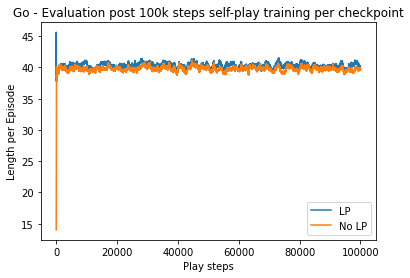

In [9]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')

sns.lineplot(x="step", y="length", data=eval_pooled,ax=axs, ci=99,
             )

sns.lineplot(x="step", y="length", data=eval_pooledThirds,ax=axs, ci=99,
             )
axs.set(xlabel='Play steps', ylabel='Length per Episode')
plt.title('Go - Evaluation post 100k steps self-play training per checkpoint')

axs.legend(['LP', 'No LP'], loc=4)

